Loading test data...
train_lyric (88, 784)
target name lost_and_cry
exist? ../thirdparty/「波音リツ」歌声データベースVer2/DATABASE/lost_and_cry/lost_and_cry.wav True
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step
(128, 700)
first-train-y (128, 700)


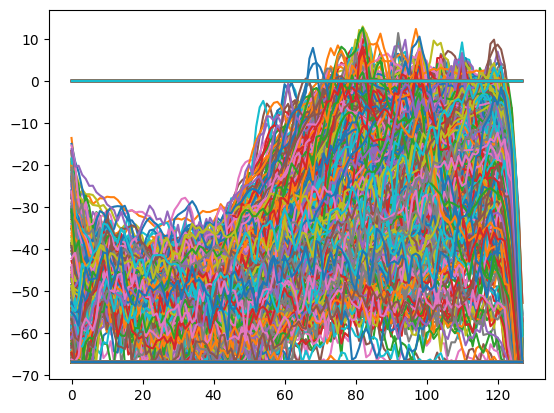

first-train-predicted (128, 700)


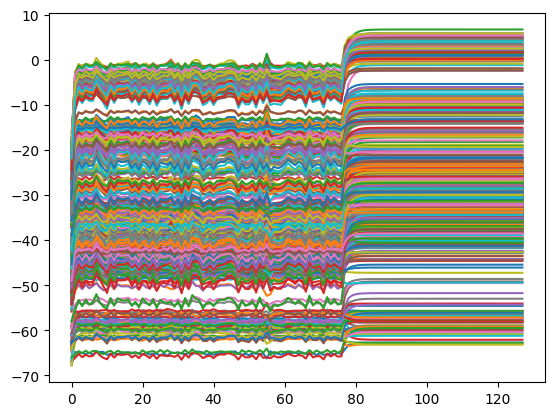

target-audio


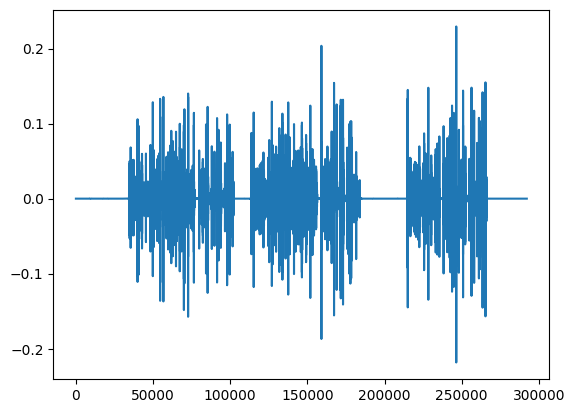

target_mel_audio


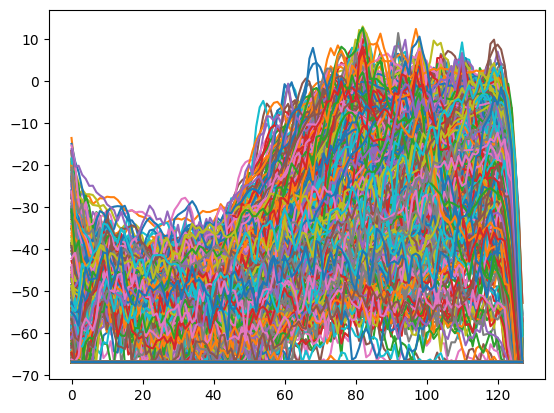

In [11]:
from data_manager import DataManager
from audio_utils import mel_to_audio, save_audio, mel_to_audio, load_audio, audio_to_mel
import numpy as np
import matplotlib.pyplot as plt
import os
import json

if __name__ == "__main__":
    manager = DataManager()
    print("Loading test data...")
    (train_lyric, train_duration, train_notenum), (test_lyric, test_duration, test_notenum), y_train, y_test = manager.get_train_and_test_data()
    print("train_lyric", train_lyric.shape)
    manager.load()
    target_name = manager.names[0]
    print("target name", target_name)
    wav_path = f"../thirdparty/「波音リツ」歌声データベースVer2/DATABASE/{target_name}/{target_name}.wav"
    print("exist?", wav_path, os.path.isfile(wav_path))

    target_audio = load_audio(wav_path)
    

    model = manager.load_model()

    predicted_mel_spectrogram = model.predict([train_lyric, train_duration, train_notenum], batch_size=32)[0]

    with open("../data/json/encode_params.json") as f:
        data = json.load(f)
        max_value = data["max"]
        min_value = data["min"]
        
    train_first_y = y_train[0]
    train_first_y = train_first_y * (max_value - min_value) + min_value
    predicted_mel_spectrogram =  predicted_mel_spectrogram * (max_value - min_value) + min_value
    
    print(predicted_mel_spectrogram.shape)

    
    tag1 = "01first-train-y"
    print(tag1, train_first_y.shape)
    plt.plot(train_first_y)
    plt.title = tag1
    plt.show()
    audio = mel_to_audio(train_first_y)
    save_audio(tag1 + ".wav", audio)
    
    tag2 = "02first-train-predicted"
    print(tag2, predicted_mel_spectrogram.shape)
    plt.plot(predicted_mel_spectrogram)
    plt.title = tag2
    plt.show()
    audio = mel_to_audio(predicted_mel_spectrogram)
    save_audio(tag2 + ".wav", audio)

    tag3 = "03target-audio"
    print(tag3)
    plt.plot(target_audio)
    plt.title = tag3
    plt.show()
    audio = mel_to_audio(train_first_y)
    save_audio(tag3 + ".wav", audio)

    tag4 = "target_mel_audio"
    print(tag4)
    mel_audio = audio_to_mel(target_audio)
    plt.plot(mel_audio)
    plt.title = tag4
    plt.show()
    save_audio(tag4 + ".wav", mel_audio)